In [1]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymongo
import pandas as pd

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_APP_GOOGLE = db['TRAVEL_APPLICATION']
collection_APP_APPLE = db['TRAVEL_APPLICATION_APPLE']

data_APP_GOOGLE = collection_APP_GOOGLE.find()
data_APP_APPLE = collection_APP_APPLE.find()

df_APP_GOOGLE = pd.DataFrame(data_APP_GOOGLE)
df_APP_APPLE = pd.DataFrame(data_APP_APPLE)

# 1. APP_GOOGLE & df_APP_APPLE 키워드(명사 형태소) 추출

In [3]:
# app(google, apple) 데이터를 concat 진행
df_app = pd.concat([df_APP_GOOGLE, df_APP_APPLE], ignore_index=True)

# 2. 자연어 전처리

In [4]:
# 데이터 사이즈 확인
df_app.shape

(17751, 6)

In [5]:
# 데이터 확인
df_app.head()

,_id,app_name,user_score,user_date,user_comments,evaluation
0,662f099973f7ce16925e6b4e,tripadvisor,4,2019년 5월 13일,낯선 여행지에서 맞든 틀리든 이런 가이드가 있다는 것은 많은 도움이 됩니다. 때론 ...,73
1,662f099973f7ce16925e6b4f,tripadvisor,2,2019년 12월 16일,웹사이트에서 구글로 로긴하고 예약한다음 메일에 티켓 다운로드하기가 있길래 폰에서 앱...,59
2,662f099a73f7ce16925e6b50,tripadvisor,1,2020년 3월 20일,최근 업데이트후 실시간 항공권 가격이 낚시성 가격으로 나오고 결제는 실제로 되지 않...,60
3,662f099a73f7ce16925e6b51,tripadvisor,4,2019년 5월 13일,여행전 항상 여행정보를 위해 열어보는 앱입니다. 숙소및 식당은 물론이거니와 들러볼만...,8
4,662f099a73f7ce16925e6b52,tripadvisor,5,2019년 5월 19일,"다양한 콘텐츠와 뷰, 리뷰가 잘 어울어진 어플. 하지만, 지극히 여행자 중심의 결과...",14


## 2.1 EDA

In [6]:
#1. 데이터의 결측치 확인
df_app.isnull().sum()

_id              0
app_name         0
user_score       0
user_date        0
user_comments    0
evaluation       0
dtype: int64

In [7]:
# 타깃의 클래스 수 확인하기
df_app["user_comments"].value_counts()

user_comments
좋아요                                             776
굿                                               471
good                                            161
Good                                            144
굳                                               127
                                               ... 
여행준비어플계의 갑!!! 그런데 관광지 정보가 좀더 다양하게 나오면좋겠네요~,~      1
항상사용해요 보기도 편하고 들고다니면서 찾기도 편해요!!                   1
잘쓰고있었는데 실행하면 강제종료됩니다 갤럭시s9+사용중입니다 업뎃부탁드려요         1
여행 정리하고 길찾고 예약하고 모든게 한번에 가능해요                     1
일정짜는데 도움이 많이 됩니다                                  1
Name: count, Length: 14399, dtype: int64

In [8]:
# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import rc

# matplotlib 한글 폰트 설정
mpl.rc('font', family='NanumBarunGothic')
# %matplotlib inline

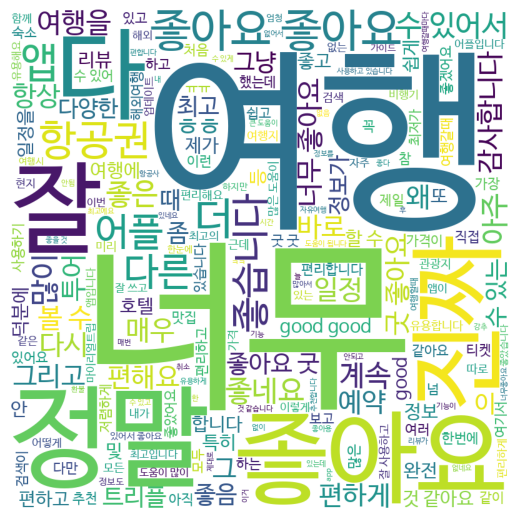

In [9]:
# 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. 문장 데이터를 단어화하기
for val in df_app["user_comments"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

# wordcloud 생성 시에 폰트 경로 지정
wordcloud = WordCloud(width = 800, height = 800, 
                font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") #x,y축 범례를 없애줌
plt.tight_layout(pad = 0)
plt.show() 

In [10]:
# 필터링할 추가적인 stopwords들 정의

stopwords_2 = ["여행", "너무", "정말", "많이", "항공권", "일정", "투어", "계속", "매우", "다", "더", "항상", "앱", "수", "있어서"
               , "한번에", "다양한", "이", "왜", "수", "잘", "진짜", "도움이", "어플", "아주", "때", "많은", "것", "있는", "다른"
               , "있어", "여행에", "다시", "좀", "볼", "정보를", "할", "바로"]

## 2.2 토큰화 및 Stopwords(불용어) 제거

In [11]:
# 토큰화된 문장확인
tokenized_text[0]

['낯선',
 '여행지에서',
 '맞든',
 '틀리든',
 '이런',
 '가이드가',
 '있다는',
 '것은',
 '많은',
 '도움이',
 '됩니다.',
 '때론',
 '기대하지',
 '않았던',
 '정보도',
 '얻을',
 '수',
 '있습니다.',
 '정보의',
 '정확성을',
 '기하기',
 '위해',
 '여기에서',
 '추천한',
 '공을',
 '다른',
 '방법으로',
 '검색해보면',
 '어느',
 '정도',
 '유추가',
 '가능해집니다.',
 '여행',
 '때마다',
 '요긴하게',
 '활용합니다.']

In [12]:
len(tokenized_text)

17751

In [13]:
# 새로운 불용어와 기존 불용어 필터링하기

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)
        
  return tokenized_filtered

In [14]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [15]:
# 필터링 되었는지 확인
tokenized_filtered[0:10]

['낯선', '여행지에서', '맞든', '틀리든', '이런', '가이드가', '있다는', '것은', '됩니다.', '때론']

In [16]:
len(tokenized_filtered)

125349

In [17]:
# 각 단어가 얼마나 나왔는지 카운트해보기

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # 많이 나온 순서대로 정렬

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))
  
  return sorted_dict

In [18]:
tokenized_dict = word_count(tokenized_filtered)

In [19]:
# 가장 상위 20개의 단어 보기
def top_20(tokenized_dict):
  top_20_words = list(tokenized_dict.items())[:20]
  return top_20_words

top_20(tokenized_dict)

[('좋아요', 1673),
 ('좋은', 578),
 ('굿', 547),
 ('편하고', 292),
 ('good', 270),
 ('좋네요', 265),
 ('편하게', 236),
 ('좋습니다', 234),
 ('좋음', 234),
 ('유용하게', 232),
 ('좋아요.', 231),
 ('여행을', 225),
 ('덕분에', 220),
 ('필요한', 217),
 ('정보가', 210),
 ('꼭', 204),
 ('편리하고', 203),
 ('정보', 202),
 ('Good', 200),
 ('있으면', 197)]

In [20]:
stopwords_2.extend(["꼭", "정보", "있으면", "여행을", "있으면", "필요한", "예약", "그리고", "그", "일정을", "트리플", "사용하기", "있습니다.", "정보가"])

In [21]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

122856

In [22]:
tokenized_dict = word_count(tokenized_filtered)

In [23]:
# 가장 상위 20개의 단어 보기
top_20(tokenized_dict)

[('좋아요', 1673),
 ('좋은', 578),
 ('굿', 547),
 ('편하고', 292),
 ('good', 270),
 ('좋네요', 265),
 ('편하게', 236),
 ('좋습니다', 234),
 ('좋음', 234),
 ('유용하게', 232),
 ('좋아요.', 231),
 ('덕분에', 220),
 ('편리하고', 203),
 ('Good', 200),
 ('좋습니다.', 183),
 ('최고의', 178),
 ('유용한', 171),
 ('굳', 165),
 ('또', 159),
 ('필수', 157)]

In [24]:
stopwords_2.extend(["또", "사용하고", "기능이", "안", "그냥", "해외여행", "같아요", "등", "있고", "가장", "큰", "많아서", "리뷰", "및", "쓰고",
"넘", "같이", "한", "특히", "있어요", "대한", "제가", "호텔", "맛집", "티켓", "가격이", "자주", "앱이", "검색이", "하고", "해외", "가격"])

In [25]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

118606

In [26]:
tokenized_dict = word_count(tokenized_filtered)
top20 = top_20(tokenized_dict)

## 2.3 키워드 분석하기

In [27]:
sentiment_df = top_20(tokenized_dict)
print(sentiment_df)

[('좋아요', 1673), ('좋은', 578), ('굿', 547), ('편하고', 292), ('good', 270), ('좋네요', 265), ('편하게', 236), ('좋습니다', 234), ('좋음', 234), ('유용하게', 232), ('좋아요.', 231), ('덕분에', 220), ('편리하고', 203), ('Good', 200), ('좋습니다.', 183), ('최고의', 178), ('유용한', 171), ('굳', 165), ('필수', 157), ('최고', 155)]


In [28]:
# 감정이 드러난 단어들을 묶어보기
emotion_dict = {"굿굿": "좋아요", "좋습니다": "좋아요", "good": "GOOD", "굳": "GOOD",
                "좋음": "좋아요", "좋네요": "좋아요", "ㅋ": "무심", "ㅠㅠ": "별로에요"}

In [29]:
from collections import defaultdict, OrderedDict

emotions_dict = defaultdict(int)

emotions_list = []

for k, v in tokenized_dict.items():
  for key, value in emotion_dict.items():
    if k == key:
      emotions_list.append((value, v))

for k, v in emotions_list:
  if k in emotions_dict:
    emotions_dict[k] += v
  else:
    emotions_dict[k] = v

emotions_dict = OrderedDict(sorted(emotions_dict.items(),
                            key=lambda item: item[1],
                            reverse=True))

emotions_dict

OrderedDict([('좋아요', 825), ('GOOD', 435), ('별로에요', 84), ('무심', 34)])

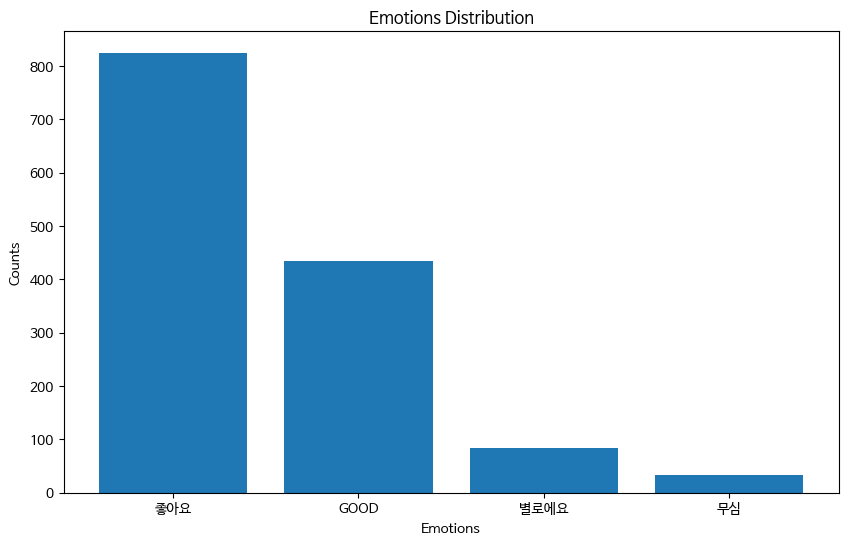

In [30]:
import matplotlib.pyplot as plt

# emotions_dict와 같이 정렬된 데이터를 사용하여 막대 그래프를 그립니다
emotions = list(emotions_dict.keys())
counts = list(emotions_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(emotions, counts)
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Emotions Distribution')
plt.show()

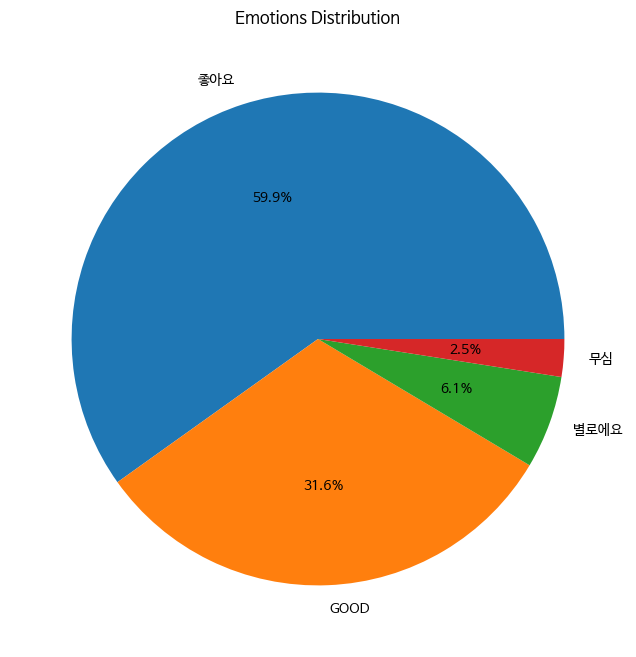

In [31]:
# 감정별 빈도수를 파이 차트로 표현합니다
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=emotions, autopct='%1.1f%%')
plt.title('Emotions Distribution')
plt.show()

In [32]:
from konlpy.tag import Komoran

def get_sentiment_score(comment):
    positive_score = 0  # 긍정 감성 점수
    negative_score = 0  # 부정 감성 점수
    words = komoran.pos(comment)  # 형태소 분석
    for word, pos in words:
        if pos in ['VA', 'VV', 'VX', 'VCP', 'VCN', 'MAG']:  # 감성 단어인 경우
            found = sentiment_df[sentiment_df[0] == word]  # 단어 검색
            if not found.empty:  # 단어가 존재하는 경우
                polarity = found.iloc[0, 1]  # 극성(긍정/부정) 확인
                if polarity == 'P':
                    positive_score += 1  # 긍정일 경우 긍정 감성 점수 +1
                elif polarity == 'N':
                    negative_score += 1  # 부정일 경우 부정 감성 점수 +1
    return positive_score, negative_score

# 각 댓글의 긍정 감성 점수와 부정 감성 점수를 계산합니다
scores = df_app['user_comments'].apply(lambda x: get_sentiment_score(x))
print(scores)  # 결과 출력

NameError: name 'komoran' is not defined